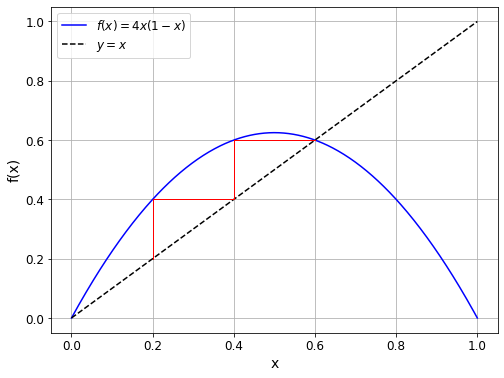

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ロジスティック写像の定義
def logistic_map(x, r=4.0):
    return r * x * (1 - x)

# パラメータの設定
r = 2.5        # 制御パラメータ
n_iter = 50    # 反復回数
x0 = 0.2       # 初期値

# ロジスティック写像のグラフを描くためのデータ
x_vals = np.linspace(0, 1, 500)
y_vals = logistic_map(x_vals, r)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x)=4x(1-x)$', color='blue')
plt.plot(x_vals, x_vals, 'k--', label=r'$y=x$')

# コブウェブ図の描画
x_current = x0
for i in range(n_iter):
    x_next = logistic_map(x_current, r)
    # 垂直線：現在の値 x_current から f(x_current) まで
    plt.plot([x_current, x_current], [x_current, x_next], 'r', lw=1)
    # 水平線：次の値 x_next へ
    plt.plot([x_current, x_next], [x_next, x_next], 'r', lw=1)
    x_current = x_next

# 軸ラベルと目盛りのフォントサイズを調整
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# PDFとして出力
plt.savefig("logistic_cobweb_r=2.5.pdf", format="pdf")
plt.show()

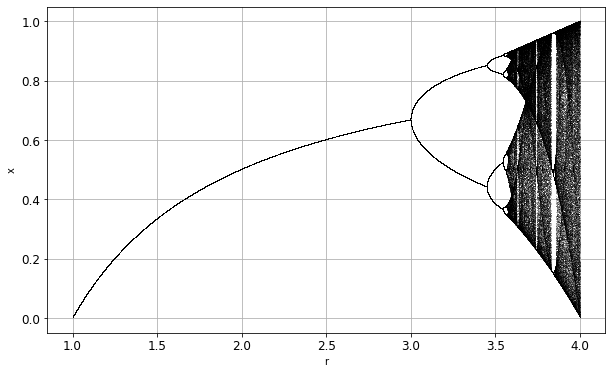

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
r_min = 1.0
r_max = 4.0
num_r = 10000         # rの刻み数
iterations = 1000     # 反復回数
last = 100            # 最後の何回分の値をプロットするか

# rの値を等間隔に生成
r_values = np.linspace(r_min, r_max, num_r)

# 初期値 x0 を設定（全ての r に対して同じ初期値）
x = 0.5 * np.ones_like(r_values)

# 各 r に対する最終的な軌道の値を格納するリスト
r_list = []
x_list = []

# 反復計算
for i in range(iterations):
    x = r_values * x * (1 - x)
    # 収束後の軌道（最後の部分）を記録
    if i >= (iterations - last):
        r_list.extend(r_values)
        x_list.extend(x)

# プロット
plt.figure(figsize=(10, 6))
plt.plot(r_list, x_list, ',k', alpha=0.25)  # ',' マーカーで多数の点をプロット
plt.xlabel("r")
plt.ylabel("x")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# PDFとして出力
plt.savefig("chaos_window.pdf", format="pdf")
plt.show()

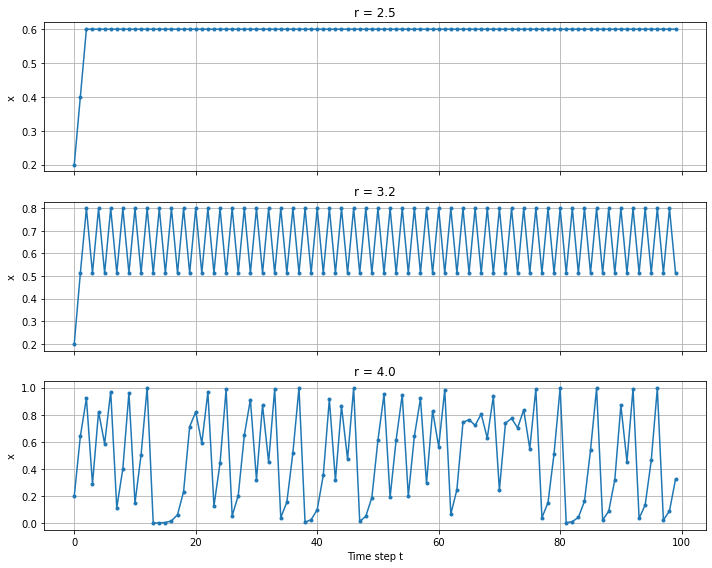

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ロジスティック写像の定義
def logistic_map(x, r):
    return r * x * (1 - x)

# 与えられた r と初期値 x0 に対して n_iter 回の反復軌道を返す関数
def time_series(r, x0, n_iter):
    xs = [x0]
    for _ in range(n_iter - 1):
        xs.append(logistic_map(xs[-1], r))
    return np.array(xs)

# 各ケースのパラメータ設定
r_values = [2.5, 3.2, 4.0]  # 収束, 周期解, カオスの例
x0 = 0.2                    # 初期値
n_iter = 100                # 反復回数

# プロットの準備：各ケースを縦に並べたサブプロットで描画
fig, axes = plt.subplots(len(r_values), 1, figsize=(10, 8), sharex=True)

for ax, r in zip(axes, r_values):
    xs = time_series(r, x0, n_iter)
    ax.plot(np.arange(n_iter), xs, marker='o', markersize=3, linestyle='-')
    ax.set_title(f"r = {r}")
    ax.set_ylabel("x")
    ax.grid(True)

axes[-1].set_xlabel("Time step t")
plt.tight_layout()
plt.show()

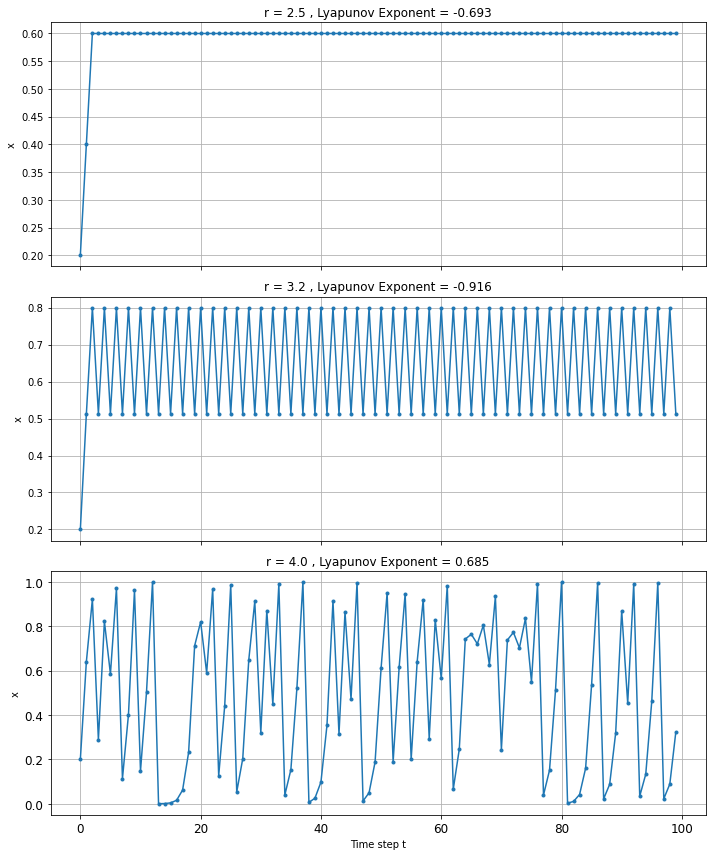

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ロジスティック写像の定義
def logistic_map(x, r):
    return r * x * (1 - x)

# 初期値 x0, パラメータ r, 反復回数 n_iter に対して時系列を生成する関数
def generate_time_series(x0, r, n_iter):
    xs = np.empty(n_iter)
    xs[0] = x0
    for i in range(1, n_iter):
        xs[i] = logistic_map(xs[i-1], r)
    return xs

# リアプノフ指数を計算する関数
def compute_lyapunov(xs, r, transient):
    # transient: 初期の捨てる反復回数
    lyapunov_sum = 0.0
    for x in xs[transient:]:
        # 微分: f'(x) = r*(1-2*x)
        lyapunov_sum += np.log(abs(r * (1 - 2 * x)) + 1e-10)  # 0対策として小さな値を加える
    return lyapunov_sum / (len(xs) - transient)

# 各ケースのパラメータ設定
x0 = 0.2
n_iter = 100      # 時系列の長さ
transient = 50   # 初期の半分を捨てる

# 収束、周期解、カオスの場合
r_values = [2.5, 3.2, 4.0]

# サブプロットの生成（各ケースごとに時系列とリアプノフ指数を表示）
fig, axes = plt.subplots(len(r_values), 1, figsize=(10, 12), sharex=True)
for ax, r in zip(axes, r_values):
    xs = generate_time_series(x0, r, n_iter)
    lambda_val = compute_lyapunov(xs, r, transient)
    ax.plot(np.arange(n_iter), xs, marker='o', markersize=3, linestyle='-')
    ax.set_title(f"r = {r} , Lyapunov Exponent = {lambda_val:.3f}")
    ax.set_ylabel("x")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.grid(True)

axes[-1].set_xlabel("Time step t")
plt.tight_layout()

# PDFとして出力
plt.savefig("chaos_timeseries.pdf", format="pdf")
plt.show()

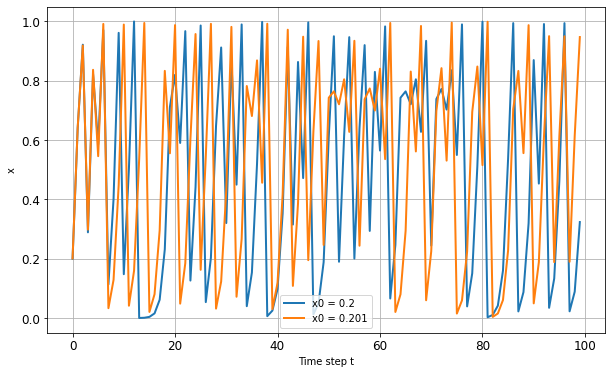

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ロジスティック写像の定義（r=4の場合）
def logistic_map(x, r=4.0):
    return r * x * (1 - x)

# 指定した初期値と反復回数で時系列を生成する関数
def generate_time_series(x0, r, n_iter):
    xs = np.empty(n_iter)
    xs[0] = x0
    for i in range(1, n_iter):
        xs[i] = logistic_map(xs[i-1], r)
    return xs

# パラメータの設定
r = 4.0
n_iter = 100            # 長期の時系列を生成
x0_1 = 0.2              # 初期値1
x0_2 = 0.2 + 0.001       # 初期値2（わずかにずらす）

# 時系列の生成
ts1 = generate_time_series(x0_1, r, n_iter)
ts2 = generate_time_series(x0_2, r, n_iter)

# 時系列のプロット
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_iter), ts1, label=f'x0 = {x0_1}', lw=2)
plt.plot(np.arange(n_iter), ts2, label=f'x0 = {x0_2}', lw=2)
plt.xlabel('Time step t')
plt.ylabel('x')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)

# PDFとして出力
plt.savefig("butterfly_effect.pdf", format="pdf")
plt.show()

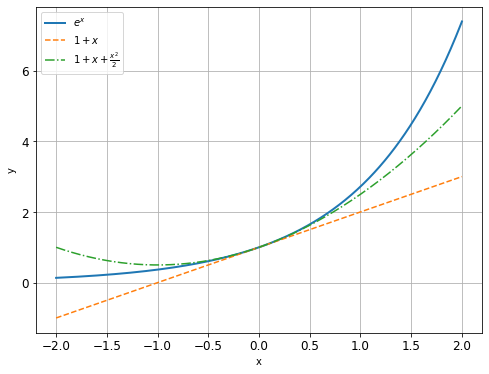

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# xの値を定義
x = np.linspace(-2, 2, 400)

# 指数関数とそのテイラー近似
y_exp = np.exp(x)
y_first = 1 + x
y_second = 1 + x + (x**2) / 2

# プロットの設定
plt.figure(figsize=(8, 6))
plt.plot(x, y_exp, label='$e^x$', lw=2)
plt.plot(x, y_first, label='$1+x$', linestyle='--')
plt.plot(x, y_second, label='$1+x+\\frac{x^2}{2}$', linestyle='-.')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)

# PDFとして出力
plt.savefig("Taylor_expansion.pdf", format="pdf")
plt.show()

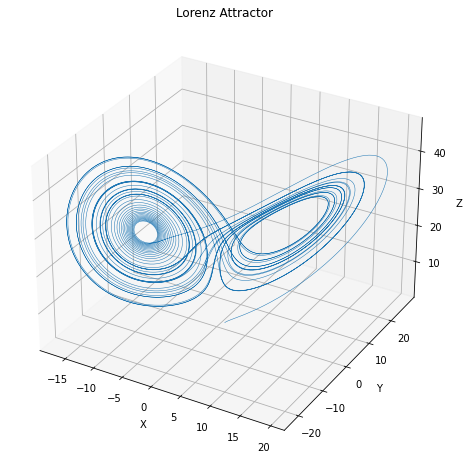

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3Dプロット用
from scipy.integrate import odeint

# ローレンツ系の微分方程式の定義
def lorenz(state, t, sigma=10, beta=8/3, rho=28):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# パラメータの設定
sigma = 10.0
beta = 8/3
rho = 28.0

# 初期状態の設定
state0 = [1.0, 1.0, 1.0]

# 時間軸の設定
t = np.linspace(0, 40, 10000)

# ローレンツ系の常微分方程式を数値解法で解く
states = odeint(lorenz, state0, t, args=(sigma, beta, rho))

# 3Dプロットの作成
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2], lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")

# PDFとして出力
plt.savefig("lorenz.pdf", format="pdf")
plt.show()